Original shape: (106302, 293)
2021 survey shape: (88291, 292)


C:\Users\PMYLS\AppData\Local\Temp\ipykernel_19004\2212425534.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['Salary_Group'] = df_salary['Q25'].apply(simplify_salary)
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_19004\2212425534.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


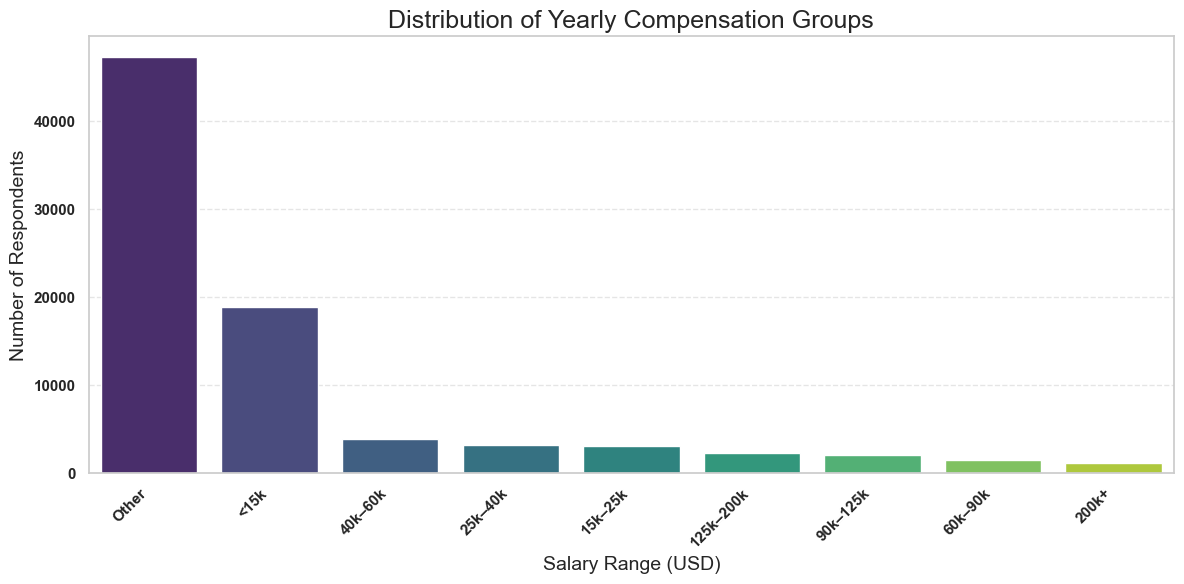

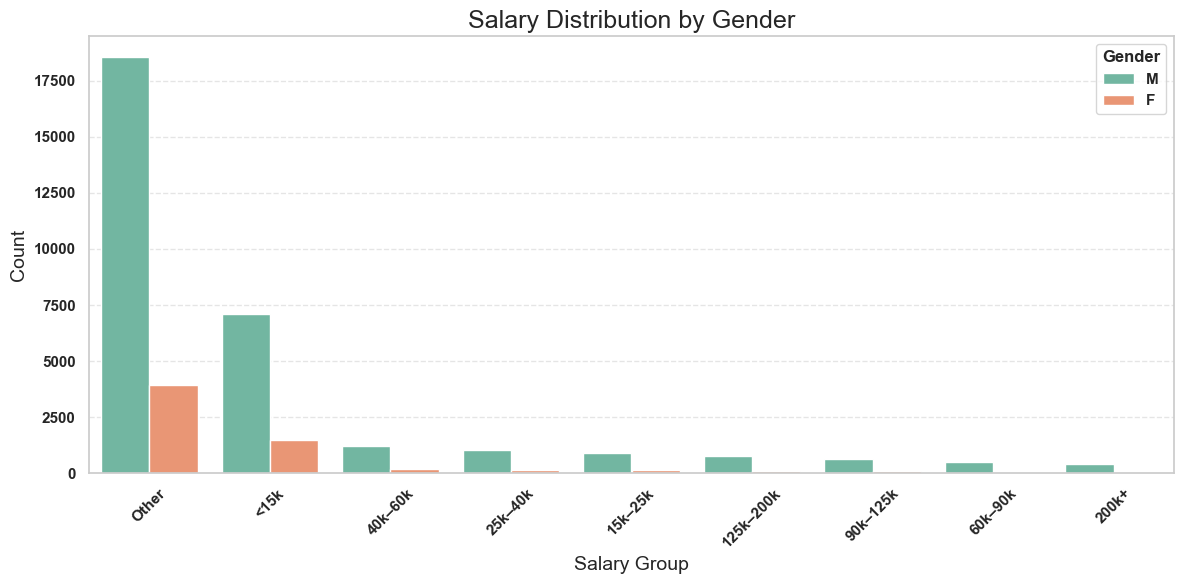

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_19004\2212425534.py:146: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


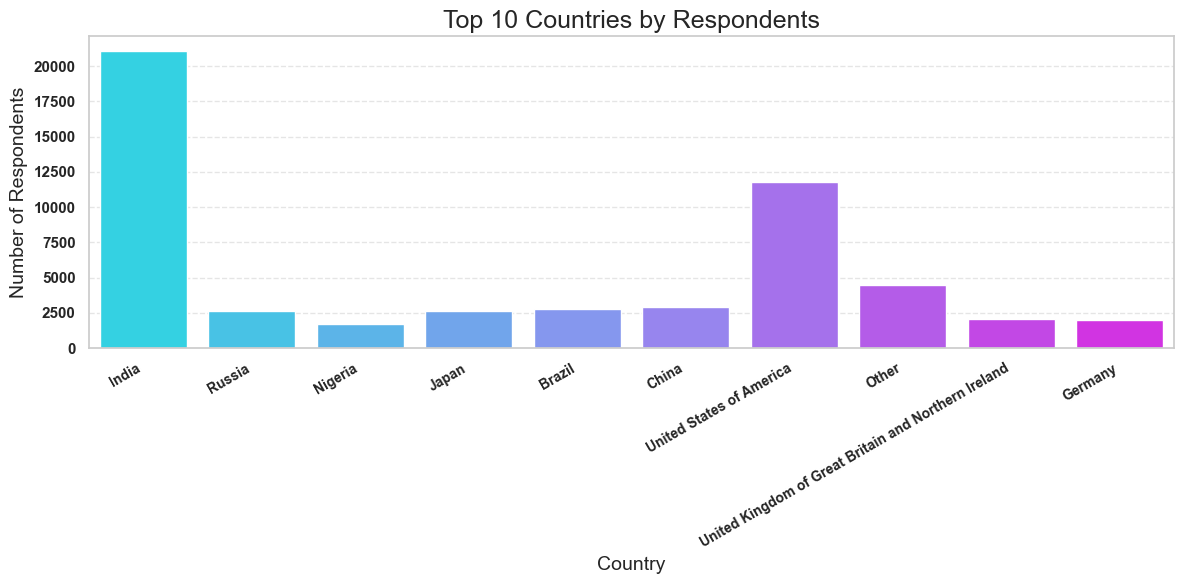

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_19004\2212425534.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['Experience_Clean'] = exp_df['Experience'].apply(lambda x: x if len(x)<=20 else x[:20]+'...')


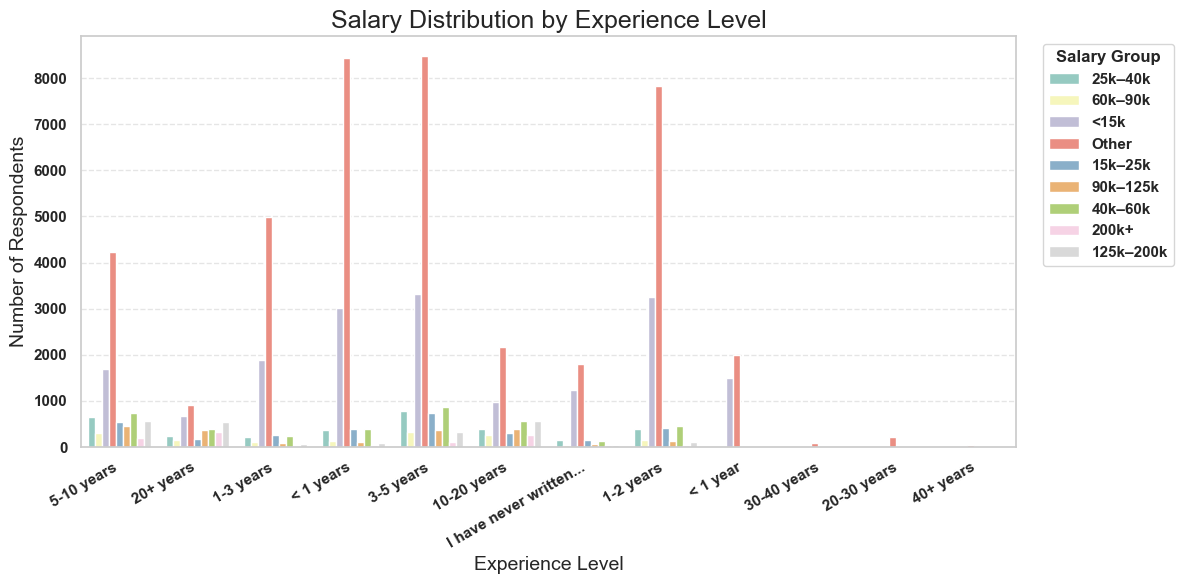

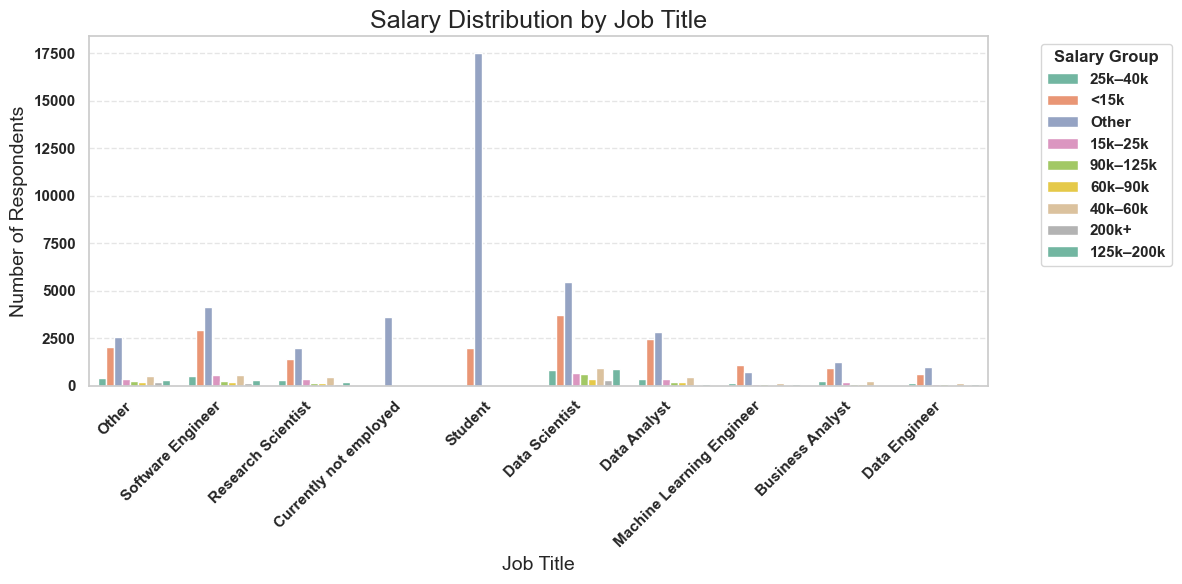

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_19004\2212425534.py:207: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text()[:15]+'...' if len(label.get_text())>18 else label.get_text()


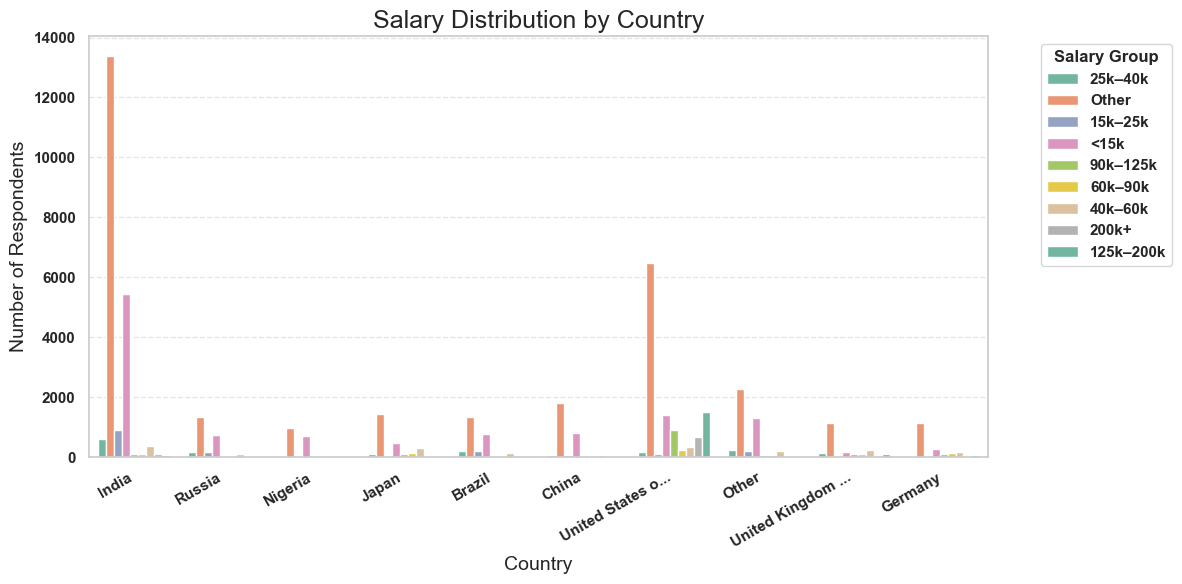

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_19004\2212425534.py:224: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_lang, x='Language', palette='Set1')


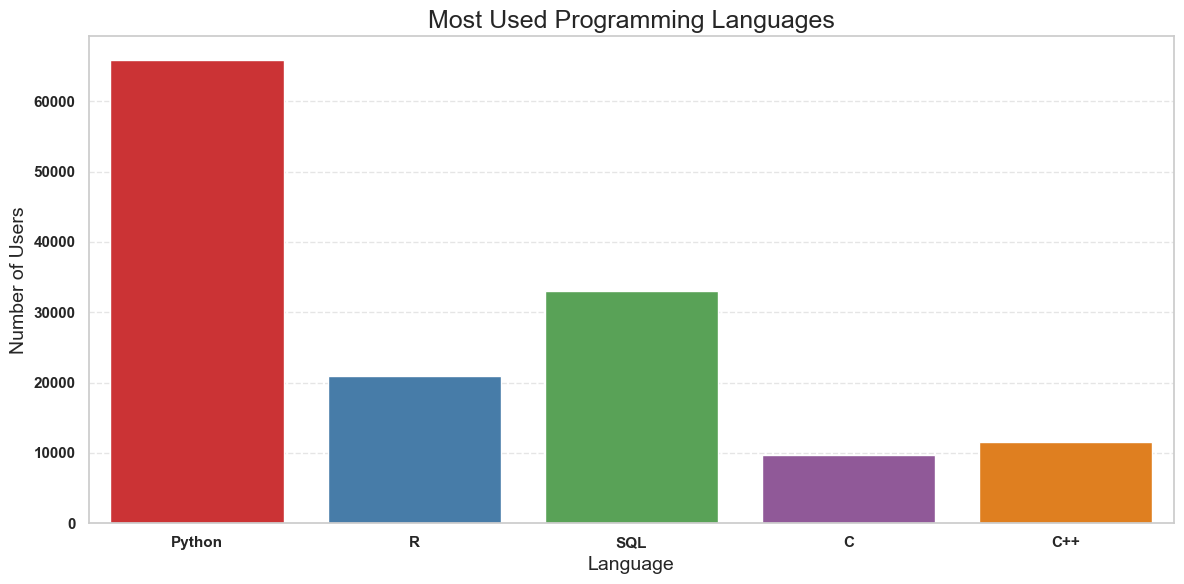

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_19004\2212425534.py:236: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_salary_age, x='Salary_Group', y='Age', palette='coolwarm')


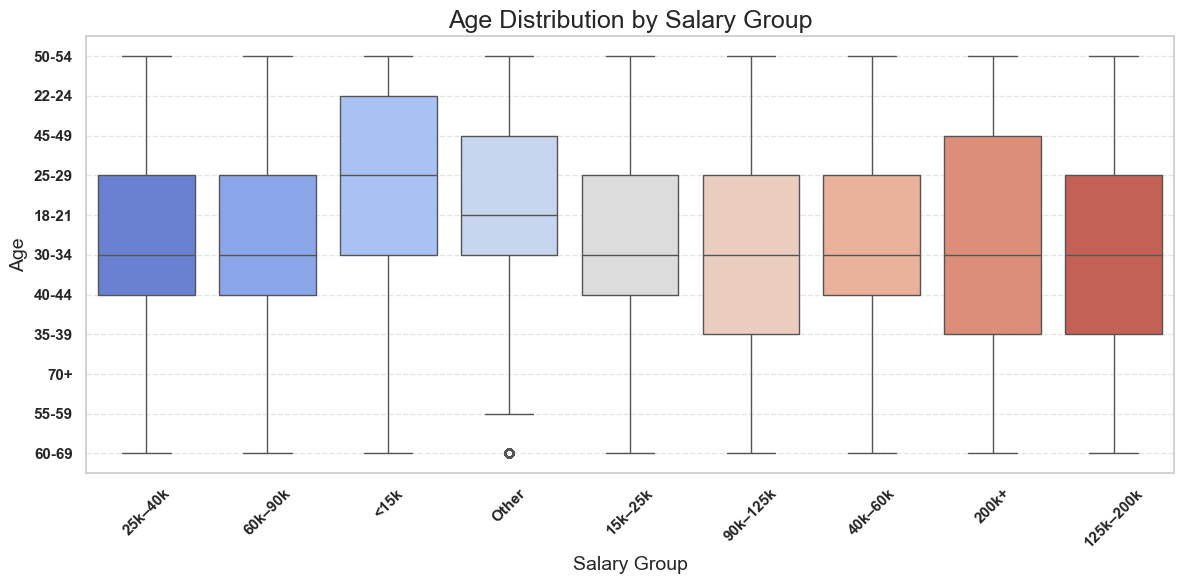

In [6]:
# -*- coding: utf-8 -*-
"""
Kaggle Survey 2021 Analysis
VS Code Ready, Modern Graphs, Data Cleaning & Insights
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ------------------------
# 1. Load Dataset
# ------------------------
file_path = "kaggle_survey_2017_2021.csv"  # Place CSV in the same folder
df = pd.read_csv(file_path, low_memory=False)
print("Original shape:", df.shape)

# ------------------------
# 2. Data Cleaning
# ------------------------
df.drop_duplicates(inplace=True)  # Remove duplicates
df.drop(columns=['-'], errors='ignore', inplace=True)  # Drop empty/unnecessary columns
df.dropna(thresh=5, inplace=True)  # Keep rows with at least 5 non-NaN values

# Focus on 2021 survey responses
df_2021 = df[df['Time from Start to Finish (seconds)'].notnull()].copy()
print("2021 survey shape:", df_2021.shape)

# Rename relevant columns
df_2021.rename(columns={
    'Q1': 'Age',
    'Q2': 'Gender',
    'Q3': 'Country',
    'Q4': 'Education',
    'Q5': 'Job Title',
    'Q6': 'Experience',
    'Q7_Part_1': 'Python',
    'Q7_Part_2': 'R',
    'Q7_Part_3': 'SQL',
    'Q7_Part_4': 'C',
    'Q7_Part_5': 'C++',
    'Q24': 'Salary'
}, inplace=True)

# Map gender to short labels
df_2021['Gender'] = df_2021['Gender'].map({'Male':'M','Female':'F'})

# ------------------------
# 3. Salary Grouping
# ------------------------
df_salary = df_2021[~df_2021['Q25'].isin([
    "I do not wish to disclose my approximate yearly compensation",
    "What is your current yearly compensation (approximate $USD)?"
])]

def simplify_salary(s):
    if pd.isna(s):
        return 'Other'
    s = str(s).replace('$','').replace(',','').strip()
    if any(x in s for x in ['0-999','0-10000','1000-1999','10000-14999']):
        return '<15k'
    elif any(x in s for x in ['15000-19999','20000-24999']):
        return '15k–25k'
    elif any(x in s for x in ['25000-29999','30000-39999']):
        return '25k–40k'
    elif any(x in s for x in ['40000-49999','50000-59999']):
        return '40k–60k'
    elif any(x in s for x in ['60000-69999','70000-89999']):
        return '60k–90k'
    elif any(x in s for x in ['90000-99999','100000-124999']):
        return '90k–125k'
    elif any(x in s for x in ['125000-149999','150000-199999']):
        return '125k–200k'
    elif any(x in s for x in ['200000-249999','250000-299999','300000-499999','500000','500000+','>500000','>1000000']):
        return '200k+'
    else:
        return 'Other'

df_salary['Salary_Group'] = df_salary['Q25'].apply(simplify_salary)

# ------------------------
# 4. Set Modern Graph Style
# ------------------------
sns.set_theme(style="whitegrid")
plt.rcParams.update({'figure.figsize': (12,6), 'axes.titlesize': 18, 'axes.labelsize': 14})

# Folder to save graphs
if not os.path.exists('graphs'):
    os.makedirs('graphs')

# ------------------------
# 5. Graphs
# ------------------------

# 5.1 Salary Group Distribution
plt.figure()
sns.countplot(
    data=df_salary,
    x='Salary_Group',
    order=df_salary['Salary_Group'].value_counts().index,
    palette='viridis'
)
plt.title('Distribution of Yearly Compensation Groups')
plt.xlabel('Salary Range (USD)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('graphs/salary_group_distribution.png')
plt.show()

# 5.2 Salary Distribution by Gender
plt.figure()
sns.countplot(
    data=df_salary,
    x='Salary_Group',
    hue='Gender',
    order=df_salary['Salary_Group'].value_counts().index,
    palette='Set2'
)
plt.title('Salary Distribution by Gender')
plt.xlabel('Salary Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('graphs/salary_by_gender.png')
plt.show()

# 5.3 Top 10 Countries by Respondents
plt.figure()
top_countries = df_salary['Country'].value_counts().nlargest(10).index
ax = sns.countplot(
    data=df_salary[df_salary['Country'].isin(top_countries)],
    x='Country',
    hue='Country',
    dodge=False,
    palette='cool'
)
plt.title('Top 10 Countries by Respondents')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.legend().remove()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('graphs/top_countries.png')
plt.show()

# 5.4 Salary by Experience Level
plt.figure()
exp_df = df_salary.dropna(subset=['Experience','Salary_Group'])
exp_df['Experience_Clean'] = exp_df['Experience'].apply(lambda x: x if len(x)<=20 else x[:20]+'...')
sns.countplot(
    data=exp_df,
    x='Experience_Clean',
    hue='Salary_Group',
    palette='Set3'
)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Salary Group', bbox_to_anchor=(1.02,1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('graphs/salary_by_experience.png')
plt.show()

# 5.5 Salary by Job Title (Top 10)
plt.figure()
df_job = df_salary.dropna(subset=['Job Title','Salary_Group'])
top_jobs = df_job['Job Title'].value_counts().nlargest(10).index
df_job_filtered = df_job[df_job['Job Title'].isin(top_jobs)]
sns.countplot(
    data=df_job_filtered,
    x='Job Title',
    hue='Salary_Group',
    palette='Set2'
)
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Salary Group', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('graphs/salary_by_job_title.png')
plt.show()

# 5.6 Salary by Country (Top 10)
plt.figure()
df_country = df_salary.dropna(subset=['Country','Salary_Group'])
top_countries = df_country['Country'].value_counts().nlargest(10).index
df_country_filtered = df_country[df_country['Country'].isin(top_countries)]
ax = sns.countplot(
    data=df_country_filtered,
    x='Country',
    hue='Salary_Group',
    palette='Set2'
)
plt.title('Salary Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
ax.set_xticklabels([label.get_text()[:15]+'...' if len(label.get_text())>18 else label.get_text()
                    for label in ax.get_xticklabels()], rotation=30, ha='right')
plt.legend(title='Salary Group', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('graphs/salary_by_country.png')
plt.show()

# ------------------------
# 6. Extra Insights (Optional)
# ------------------------

# 6.1 Top Programming Languages Used
plt.figure()
langs = ['Python','R','SQL','C','C++']
df_lang = df_2021[langs].melt(var_name='Language', value_name='Used')
df_lang = df_lang[df_lang['Used'].notnull()]
sns.countplot(data=df_lang, x='Language', palette='Set1')
plt.title('Most Used Programming Languages')
plt.xlabel('Language')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('graphs/programming_languages.png')
plt.show()

# 6.2 Age vs Salary Group
plt.figure()
df_salary_age = df_salary[df_salary['Age'].notnull()]
sns.boxplot(data=df_salary_age, x='Salary_Group', y='Age', palette='coolwarm')
plt.title('Age Distribution by Salary Group')
plt.xlabel('Salary Group')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('graphs/age_vs_salary.png')
plt.show()



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ------------------------
# Load dataset
# ------------------------
file_path = "kaggle_survey_2017_2021.csv"  # Update if your filename is different
df = pd.read_csv(file_path, low_memory=False)

# ------------------------
# Data Cleaning
# ------------------------
df.drop_duplicates(inplace=True)
df.drop(columns=['-'], errors='ignore', inplace=True)
df.dropna(thresh=5, inplace=True)
df_2021 = df[df['Time from Start to Finish (seconds)'].notnull()].copy()
df_2021.rename(columns={
    'Q1': 'Age', 'Q2': 'Gender', 'Q3': 'Country', 'Q4': 'Education',
    'Q5': 'Job Title', 'Q6': 'Experience', 'Q24': 'Salary'
}, inplace=True)
df_2021['Gender'] = df_2021['Gender'].map({'Male':'M','Female':'F'})

# ------------------------
# Salary Grouping
# ------------------------
df_salary = df_2021[~df_2021['Q25'].isin([
    "I do not wish to disclose my approximate yearly compensation",
    "What is your current yearly compensation (approximate $USD)?"
])]

def simplify_salary(s):
    if pd.isna(s):
        return 'Other'
    s = str(s).replace('$','').replace(',','').strip()
    if any(x in s for x in ['0-999','0-10000','1000-1999','10000-14999']):
        return '<15k'
    elif any(x in s for x in ['15000-19999','20000-24999']):
        return '15k–25k'
    elif any(x in s for x in ['25000-29999','30000-39999']):
        return '25k–40k'
    elif any(x in s for x in ['40000-49999','50000-59999']):
        return '40k–60k'
    elif any(x in s for x in ['60000-69999','70000-89999']):
        return '60k–90k'
    elif any(x in s for x in ['90000-99999','100000-124999']):
        return '90k–125k'
    elif any(x in s for x in ['125000-149999','150000-199999']):
        return '125k–200k'
    elif any(x in s for x in ['200000-249999','250000-299999','300000-499999','500000','500000+','>500000','>1000000']):
        return '200k+'
    else:
        return 'Other'

df_salary['Salary_Group'] = df_salary['Q25'].apply(simplify_salary)

# ------------------------
# Graph Setup
# ------------------------
sns.set_theme(style="whitegrid")
plt.rcParams.update({'figure.figsize': (12,6), 'axes.titlesize': 16, 'axes.labelsize': 12})

# Create folder to save graphs
if not os.path.exists('graphs'):
    os.makedirs('graphs')

# ------------------------
# 1. Overall Salary Distribution
# ------------------------
plt.figure()
sns.countplot(data=df_salary, x='Salary_Group', order=df_salary['Salary_Group'].value_counts().index, palette='viridis')
plt.title('Overall Salary Distribution')
plt.xlabel('Salary Range (USD)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('graphs/salary_group_distribution.png')
plt.close()

# ------------------------
# 2. Salary by Gender
# ------------------------
plt.figure()
sns.countplot(data=df_salary, x='Salary_Group', hue='Gender', order=df_salary['Salary_Group'].value_counts().index, palette='Set2')
plt.title('Salary Distribution by Gender')
plt.xlabel('Salary Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('graphs/salary_by_gender.png')
plt.close()

# ------------------------
# 3. Salary by Experience
# ------------------------
exp_df = df_salary.dropna(subset=['Experience'])
exp_df['Experience_Clean'] = exp_df['Experience'].apply(lambda x: x if len(x)<=20 else x[:20]+'...')
plt.figure()
sns.countplot(data=exp_df, x='Experience_Clean', hue='Salary_Group', palette='Set3')
plt.title('Salary Distribution by Experience')
plt.xlabel('Experience Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('graphs/salary_by_experience.png')
plt.close()

# ------------------------
# 4. Salary by Job Title (Top 10)
# ------------------------
df_job = df_salary.dropna(subset=['Job Title'])
top_jobs = df_job['Job Title'].value_counts().nlargest(10).index
df_job_filtered = df_job[df_job['Job Title'].isin(top_jobs)]
plt.figure()
sns.countplot(data=df_job_filtered, x='Job Title', hue='Salary_Group', palette='Set2')
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('graphs/salary_by_job_title.png')
plt.close()

# ------------------------
# 5. Salary by Country (Top 10)
# ------------------------
df_country = df_salary.dropna(subset=['Country'])
top_countries = df_country['Country'].value_counts().nlargest(10).index
df_country_filtered = df_country[df_country['Country'].isin(top_countries)]
plt.figure()
sns.countplot(data=df_country_filtered, x='Country', hue='Salary_Group', palette='Set2')
plt.title('Salary Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('graphs/salary_by_country.png')
plt.close()

print("All salary graphs saved in the 'graphs' folder.")


C:\Users\PMYLS\AppData\Local\Temp\ipykernel_19004\1222782917.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['Salary_Group'] = df_salary['Q25'].apply(simplify_salary)
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_19004\1222782917.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_salary, x='Salary_Group', order=df_salary['Salary_Group'].value_counts().index, palette='viridis')
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_19004\1222782917.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

All salary graphs saved in the 'graphs' folder.
